**Implementation of a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms**

**Upload the dataset**

In [15]:
from google.colab import files
upload=files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


**Import libraries**


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Load the training dataset**

In [17]:
train_file_path = '/content/train.csv'  # Adjust the file path as necessary
df_train = pd.read_csv(train_file_path)

**Load the testing dataset**

In [18]:
test_file_path = '/content/test.csv'  # Adjust the file path as necessary
df_test = pd.read_csv(test_file_path)

**Drop rows with missing values in both datasets**

In [24]:
df_train = df_train.dropna(subset=['LotArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'])
print (df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [25]:
df_test = df_test.dropna(subset=['LotArea', 'BedroomAbvGr', 'FullBath'])
print (df_test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

**Calculate missing values for each column in df_train**

In [22]:
missing_values_count = df_train.isnull().sum()
print(missing_values_count)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [23]:
missing_columns = missing_values_count[missing_values_count > 0].index.tolist()
print(missing_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


**Plotting missing values**

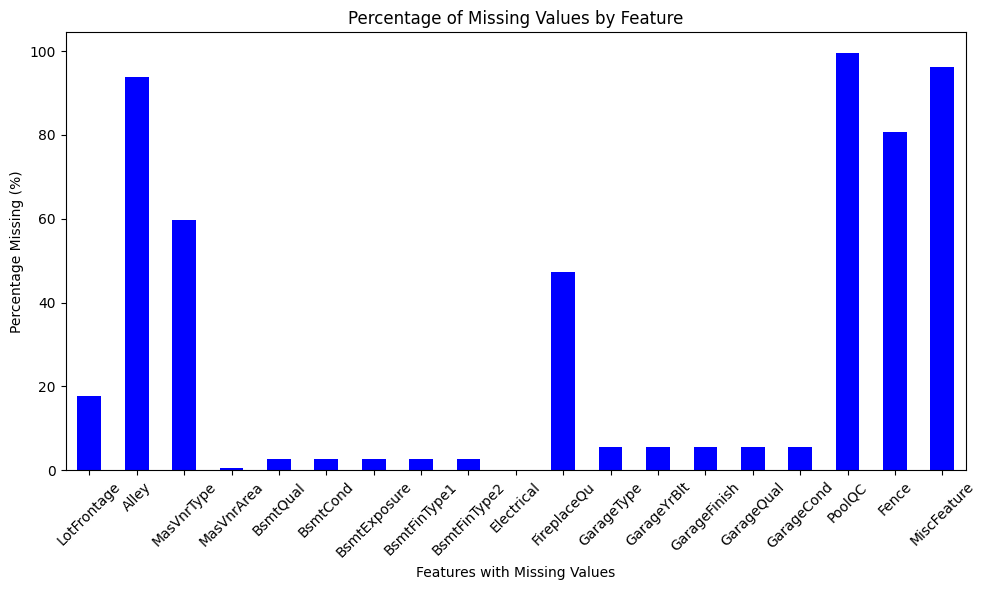

In [26]:
plt.figure(figsize=(10, 6))
missing_values_percentage = (missing_values_count / len(df_train)) * 100
missing_values_percentage[missing_columns].plot(kind='bar', color='blue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features with Missing Values')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Define features and target**

In [27]:
X_train = df_train[['LotArea', 'BedroomAbvGr', 'FullBath']]
y_train = df_train['SalePrice']
ids_test = df_test['Id']
X_test = df_test[['LotArea', 'BedroomAbvGr', 'FullBath']]

**Train the model**

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Make predictions on the testing dataset**

In [39]:
y_pred = regressor.predict(X_test)
print(y_pred)

[142234.75829606 140818.27490856 220355.99968348 ... 144333.35962974
 134708.11312625 213643.76498116]


**Evaluate the model using the training dataset for MSE and R^2 Score**

In [31]:
y_train_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print("MSE:", mse)
r2 = r2_score(y_train, y_train_pred)
print("R^2 Score:", r2)

MSE: 4066873836.623575
R^2 Score: 0.3551593205342346


**Output in the desired format for the testing dataset**

In [34]:
output_df = pd.DataFrame({'Id': ids_test, 'SalePrice': y_pred})
output_df['SalePrice'] = output_df['SalePrice'].round(4)
print(output_df)

        Id    SalePrice
0     1461  142234.7583
1     1462  140818.2749
2     1463  220355.9997
3     1464  214204.3156
4     1465  211902.9588
...    ...          ...
1454  2915  121125.5397
1455  2916  121058.4653
1456  2917  144333.3596
1457  2918  134708.1131
1458  2919  213643.7650

[1459 rows x 2 columns]


**Plotting Actual vs Predicted Sale Prices**

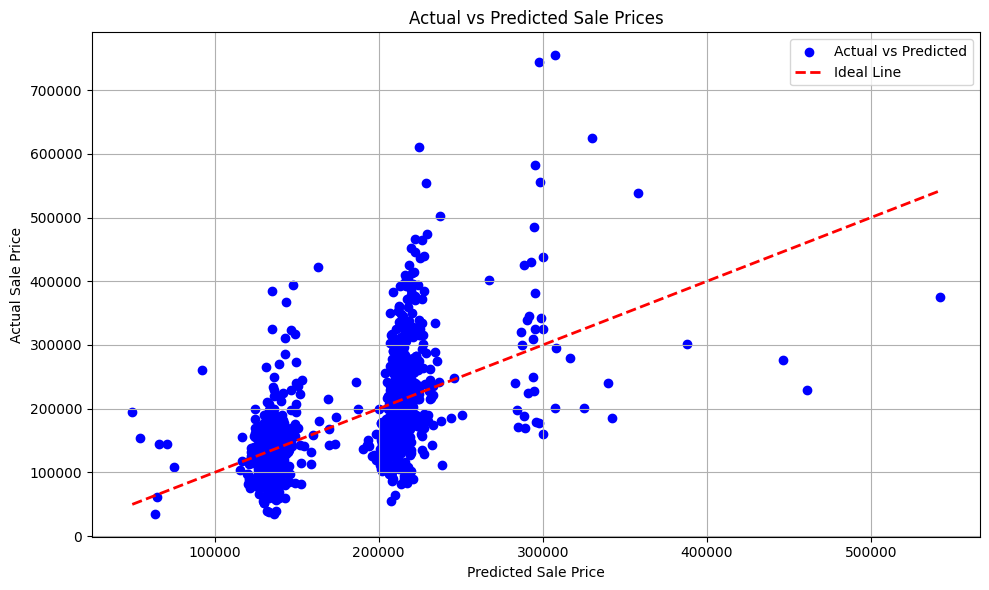

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train, color='blue', label='Actual vs Predicted')
plt.plot([min(y_train_pred), max(y_train_pred)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--', lw=2, label='Ideal Line')
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Save to CSV**

In [40]:
output_df.to_csv('/content/task1.csv', index=False)